# Визуализация данных в Python

## Обзор библиотек

1. Matplotlib - базовая графика
2. Seaborn - углубленная базовая графика
3. Plotly - динамические графики

| Matplotlib | Seaborn |
| ----------- | ----------- |
| Используется для базового построения графиков, таких как линейные диаграммы, гистограммы и т. д.    | Используется для визуализации статистики и может выполнять сложные визуализации с меньшим количеством команд.   |
|  Продуктивно работает с массивами данных и фреймами.  | Seaborn значительно более организован и функционален, чем Matplotlib, и рассматривает весь набор данных как единую единицу.   |
| Matplotlib более настраиваемый и хорошо сочетается с Pandas и Numpy для анализа исследуемых данных.   | Seaborn имеет больше встроенных тем и в основном используется для статистического анализа.  |

# **Matplotlib**. Линейные графики

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Сгенерируем простой набор данных.

In [ ]:
y = [1, 2, 3, 3.5, 3.7, 4, 4.1]

Визуализируем с помощью функции **plot**.

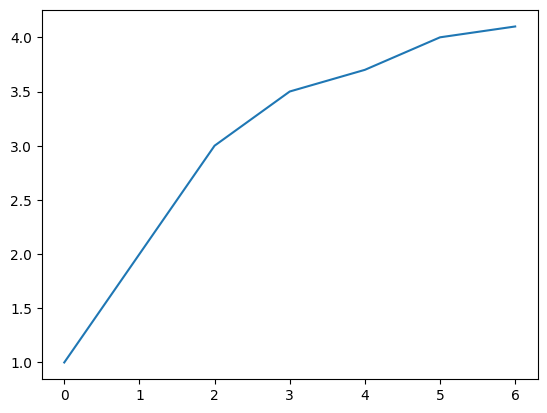

In [ ]:
plt.plot(y)
plt.show()

Добавим ось ОХ.

In [ ]:
x = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

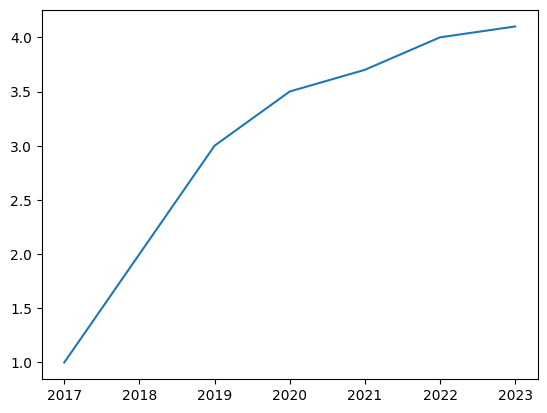

In [ ]:
plt.plot(x,y)
plt.show()

Добавляем подписи осей.

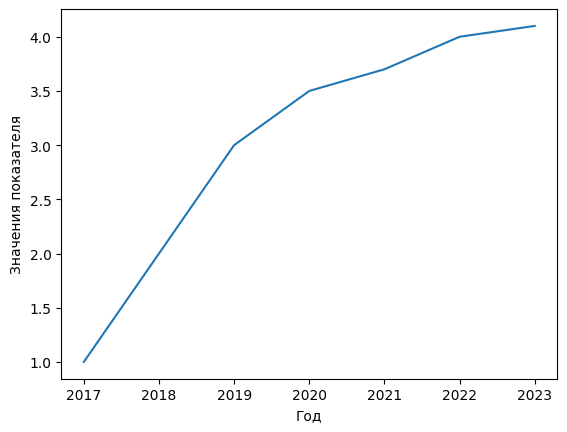

In [ ]:
plt.plot(x,y)
plt.xlabel('Год')
plt.ylabel('Значения показателя')
plt.show()

Добавляем второй набор данных и отрисовываем оба ряда на одном графике.

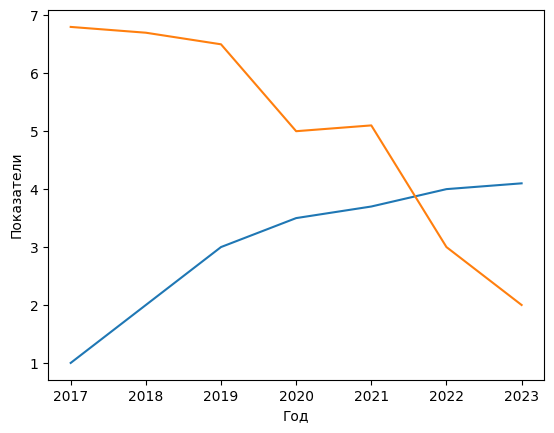

In [ ]:
#y = [1, 2, 3, 3.5, 3.7, 4, 4.1]
y2 = [6.8, 6.7, 6.5, 5, 5.1, 3.0, 2]
#x = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('Год')
plt.ylabel('Показатели')
plt.show()

Добавляем легенду.

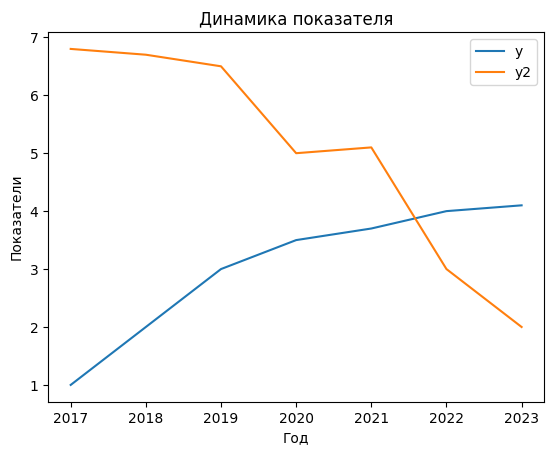

In [ ]:
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('Год')
plt.ylabel('Показатели')
plt.title('Динамика показателя')
plt.legend(['y', 'y2'])
plt.show()

Добавляем маркеры для выделения каждого наблюдения.

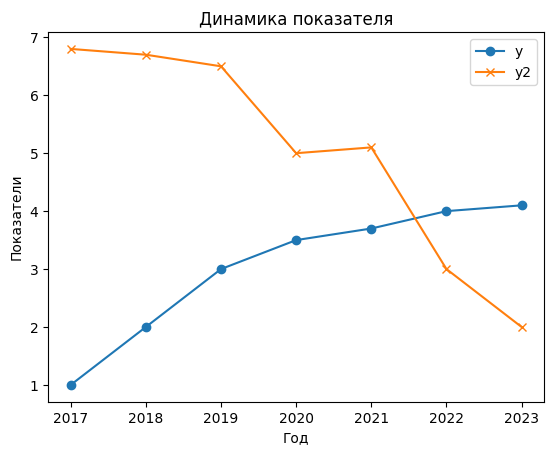

In [ ]:
plt.plot(x,y, marker = 'o')
plt.plot(x,y2, marker = 'x')
plt.xlabel('Год')
plt.ylabel('Показатели')
plt.title('Динамика показателя')
plt.legend(['y', 'y2'])
plt.show()

Построим все то же самое с помощью библиотеки **Seaborn**.

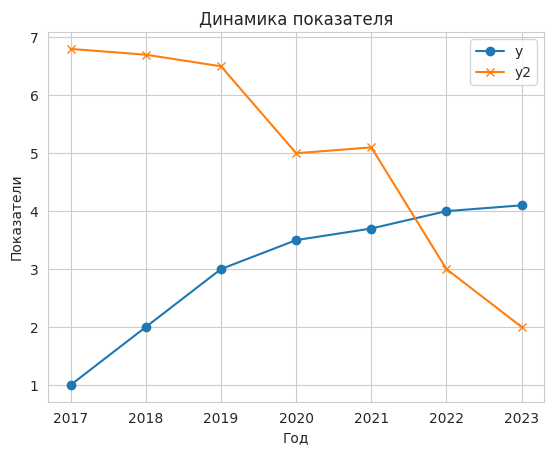

In [ ]:
sns.set_style("whitegrid") #darkgrid

plt.plot(x,y, marker = 'o')
plt.plot(x,y2, marker = 'x')
plt.xlabel('Год')
plt.ylabel('Показатели')
plt.title('Динамика показателя')
plt.legend(['y', 'y2'])
plt.show()

## Barplot или столбчатые графики

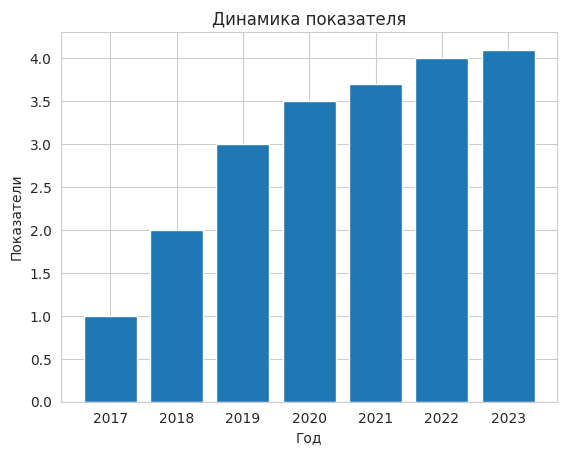

In [ ]:
plt.bar(x,y)
plt.xlabel('Год')
plt.ylabel('Показатели')
plt.title('Динамика показателя')
plt.show()

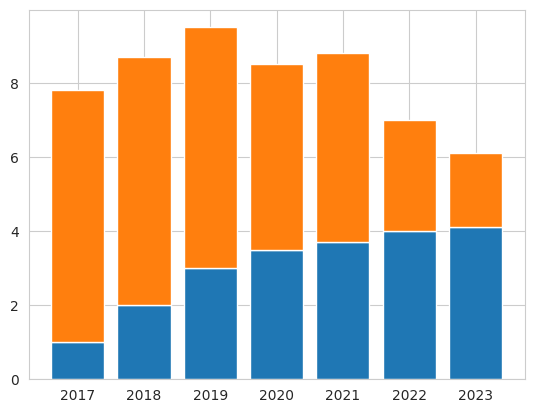

In [ ]:
plt.bar(x,y)
plt.bar(x,y2, bottom = y)
plt.show()

## График-пирог

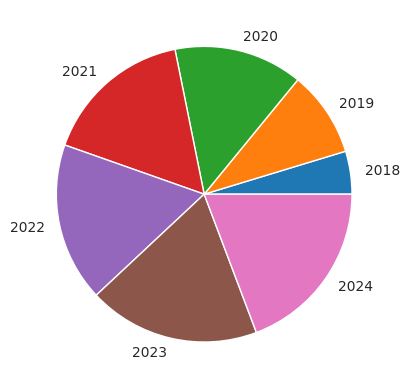

In [ ]:
x_labels = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
plt.pie(y, labels = x_labels)
plt.show()

# **Seaborn.** Гистограммы

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


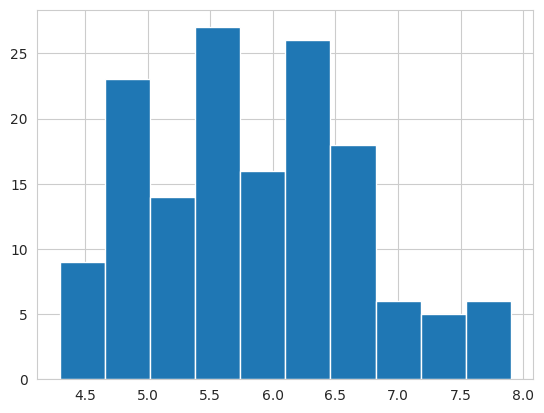

In [ ]:
plt.hist(iris.sepal_length)
plt.show()

Можем задать количество блоков с помощью параметра **bins**.

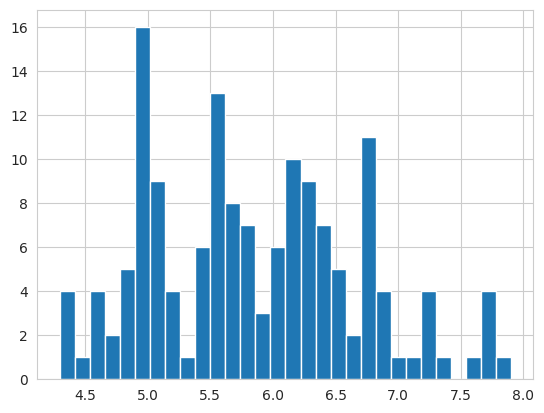

In [ ]:
plt.hist(iris.sepal_length, bins = 30)
plt.show()

Регулируем прозрачность гистограммы с помощью параметра **alpha**. Можем построить гистограммы для нескольких наборов данных на одном графике.

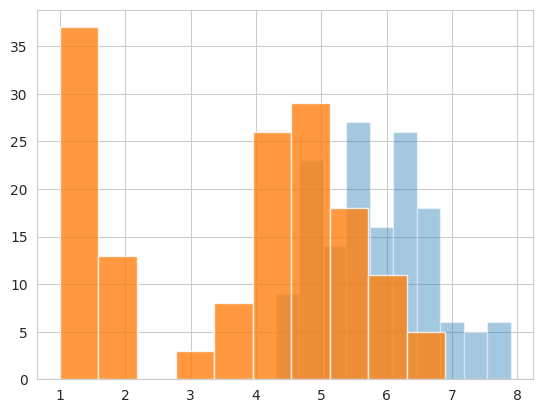

In [ ]:
plt.hist(iris.sepal_length, alpha = 0.4)
plt.hist(iris.petal_length, alpha = 0.8)
plt.show()

Параметр **stacked** для совместной отрисовки данных.

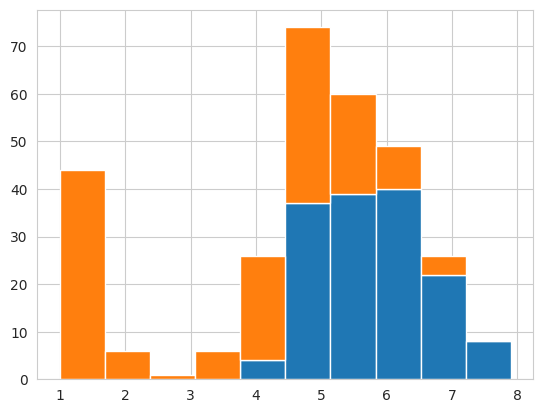

In [ ]:
plt.hist([iris.sepal_length,iris.petal_length], stacked = True)
plt.show()

## Точечные графики или scatteplot

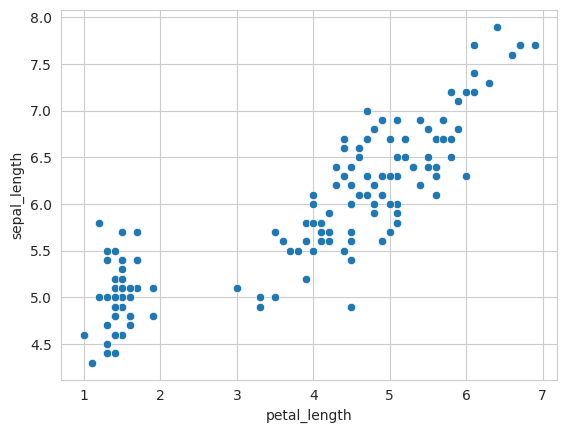

In [ ]:
ax = sns.scatterplot(x='petal_length', y='sepal_length', data=iris)
plt.show()

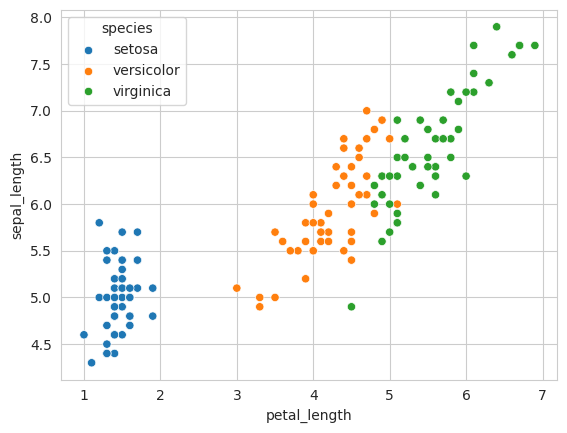

In [ ]:
ax = sns.scatterplot(x="petal_length", y="sepal_length", data=iris, hue = 'species')
plt.show()

Добавляем тренд.

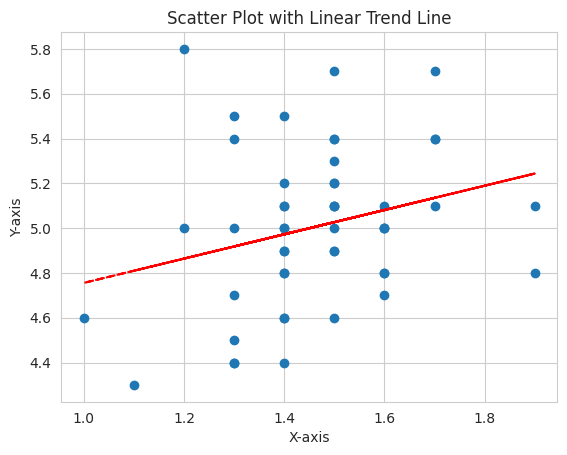

In [ ]:
# Calculate the best-fit line
import numpy as np

x = iris.loc[iris.species == 'setosa','petal_length']
y = iris.loc[iris.species == 'setosa','sepal_length']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the scatter plot and the trend line
plt.scatter(x, y)
plt.plot(x, p(x), "r--")  # 'r--' is for a red dashed line
plt.title("Scatter Plot with Linear Trend Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## ! Задание 1.
Добавить тренды для других сортов ирисов.

In [ ]:
iris.species.unique()



array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Тепловые карты

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Приведенный выше набор данных *flights* показывает нам ежемесячную загруженность в аэропорту с 1949 по 1960 год. Значения представляют собой количество пассажиров (в тысячах), прошедших через вход аэропорта.

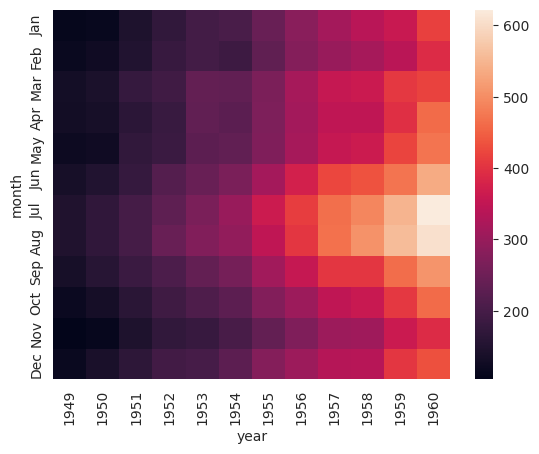

In [ ]:
sns.heatmap(flights)
plt.show()

Чем светлее цвет, тем выше пешеходная заходка в аэропорту. Глядя на график, мы можем сделать вывод, что:

- Самые высокие значения в июле и августе.
- Количество пешеходов растет с каждым годом.
- Любой месяц в году будет иметь более высокую проходимость по сравнению с предыдущими годами.


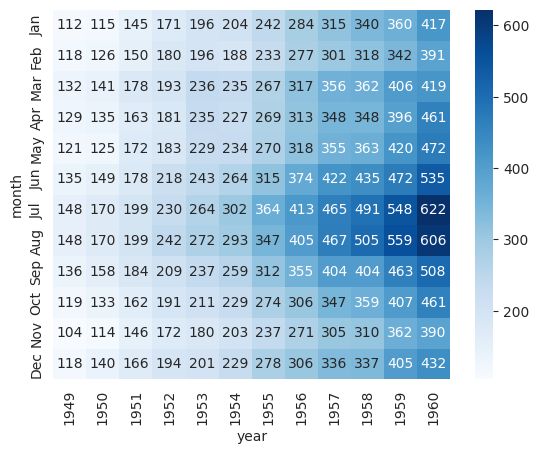

In [ ]:
sns.heatmap(flights, fmt = 'd', annot = True, cmap = 'Blues')
plt.show()

# Анализ данных на примере датасета Titanic

In [ ]:
# Настройки визуализации
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize':(12,7),
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

Загрузим данные и посмотрим информацию о них.

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### Анализируем класс (Pclass)

Посмотрим, какие классы есть в данных.

In [ ]:
df.Pclass.unique()

array([3, 1, 2])

Команда **value_counts()** позволяется вывести количество для каждого уникального значения. Запомним ее.

In [ ]:
df.Pclass.value_counts()

,count
Pclass,
3,487
1,216
2,184


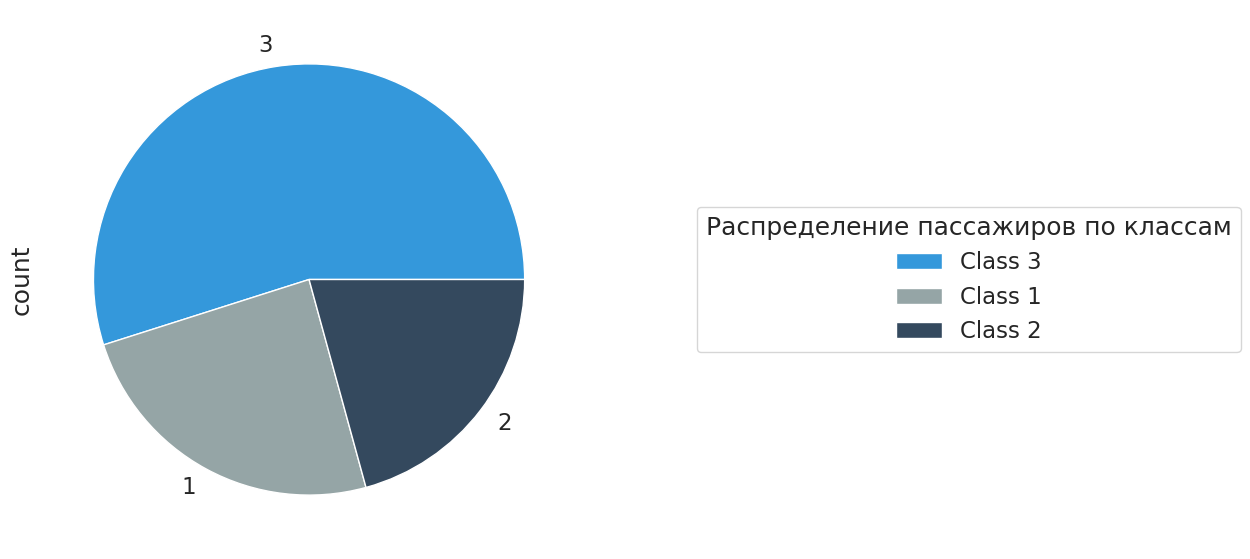

In [ ]:
df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Распределение пассажиров по классам")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

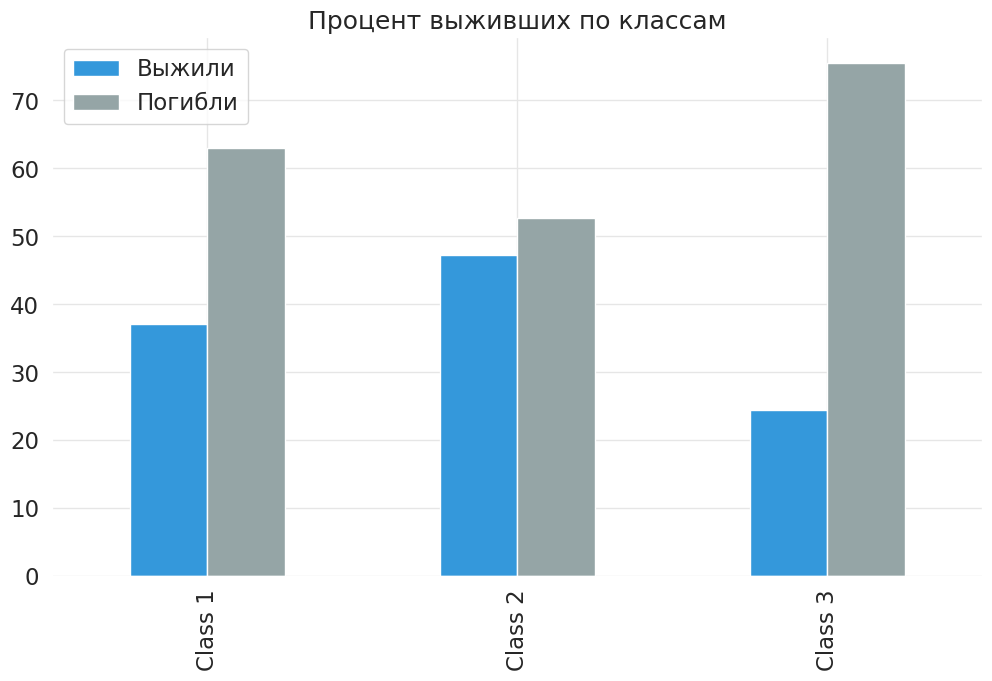

In [ ]:
pclass_1_survivor_distribution = round((df[df.Pclass == 1].Survived == 1).value_counts()[1]/len(df[df.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((df[df.Pclass == 2].Survived == 1).value_counts()[1]/len(df[df.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((df[df.Pclass == 3].Survived == 1).value_counts()[1]/len(df[df.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Выжили":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},
     "Погибли":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Процент выживших по классам")
plt.show()

*Пример анализа по показателю:*

Показатель **Pclass** - класс, соотвествующий билету пассажира. Пассажиры могли выбрать из трех отдельных классов, а именно: класс 1, класс 2 и класс 3. Третий класс имел наибольшее количество пассажиров, затем класс 2 и класс 1. Количество пассажиров в третьем классе было больше, чем количество пассажиров в первом и втором классе вместе взятых. Вероятность выживания пассажира класса 1 была выше, чем пассажира класса 2 и класса 3.

### Анализ показателя пол (Sex)

In [ ]:
df.Sex.value_counts(normalize = True)

,proportion
Sex,
male,0.645998
female,0.354002


Построим **barplot** процент женщин и мужчин на Титанике.

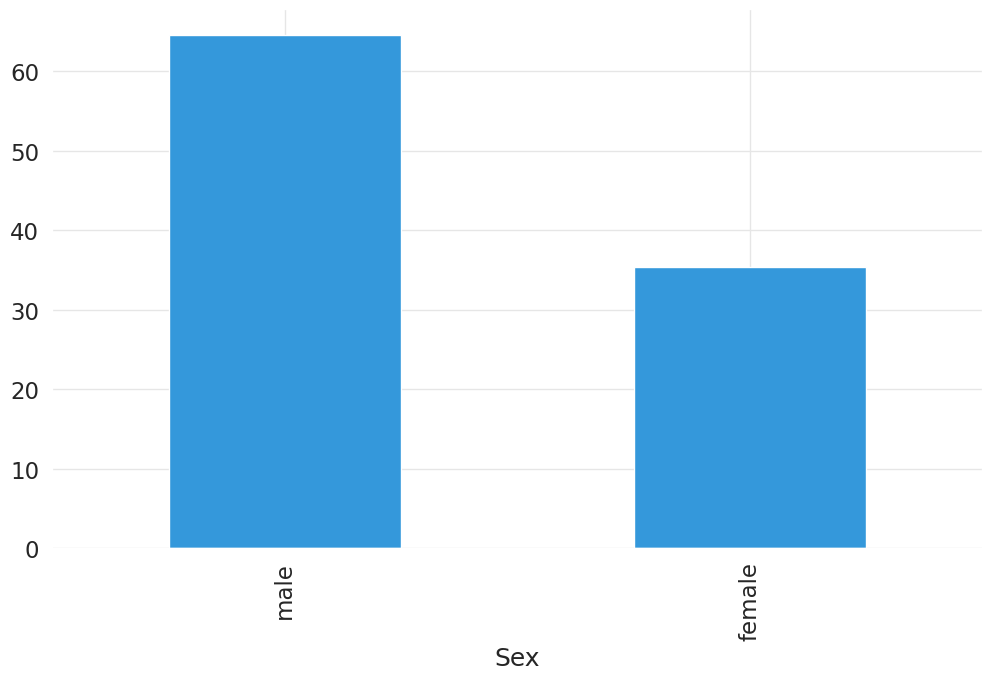

In [ ]:
(df.Sex.value_counts(normalize = True) * 100).plot.bar()
plt.show()

Посмотрим процент выживших среди мужчин и женщин.

In [ ]:
df[df.Sex == 'male'].Survived == 1

,Survived
0,False
4,False
5,False
6,False
7,False
...,...
879,False
880,False
882,False
885,True


In [ ]:
(df[df.Sex == 'male'].Survived == 1).value_counts()

,count
Survived,
False,464
True,109


In [ ]:
round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex)*100,2)

12.29

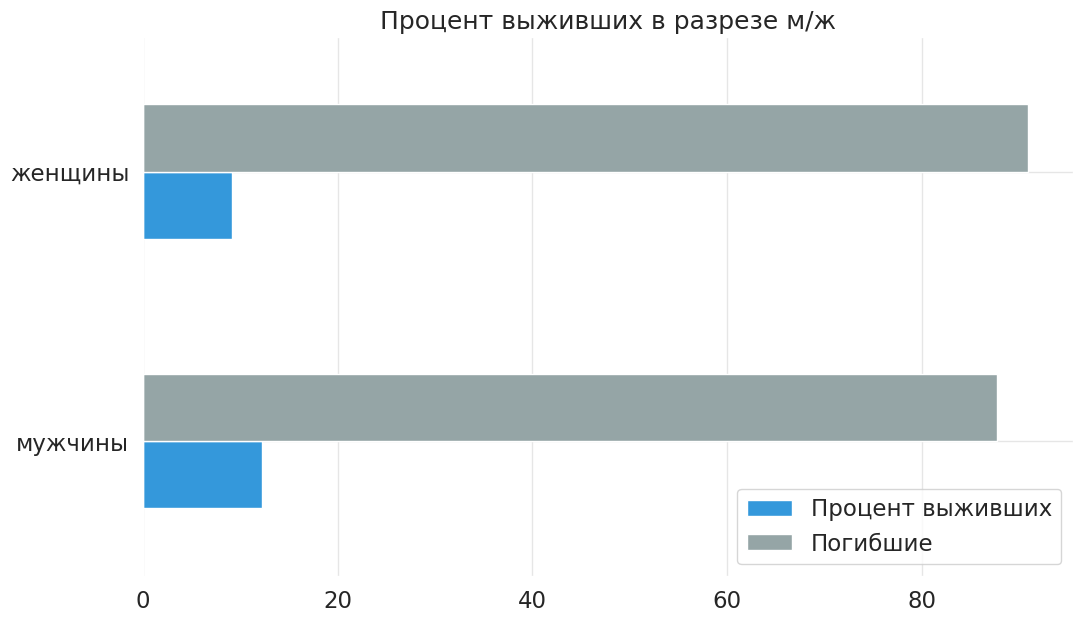

In [ ]:
male_pr = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female_pr = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Процент выживших":{"мужчины": male_pr,"женщины": female_pr},  "Погибшие":{"мужчины": 100-male_pr,"женщины": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Процент выживших в разрезе м/ж")
plt.show()

*Пример анализа:*

Примерно 65% пассажиров составляли мужчины, а остальные 35% — женщины. Тем не менее, процент выживших женщин был выше, чем число выживших мужчин. Более 80% мужчин умерли, в сравнении с примерно 70% женщинами.

### Анализируем возраст (Age)

In [ ]:
min(df['Age'])

0.42

In [ ]:
max(df['Age'])

80.0

Зададим интервалы и сгруппируем данные в эти интервалы.

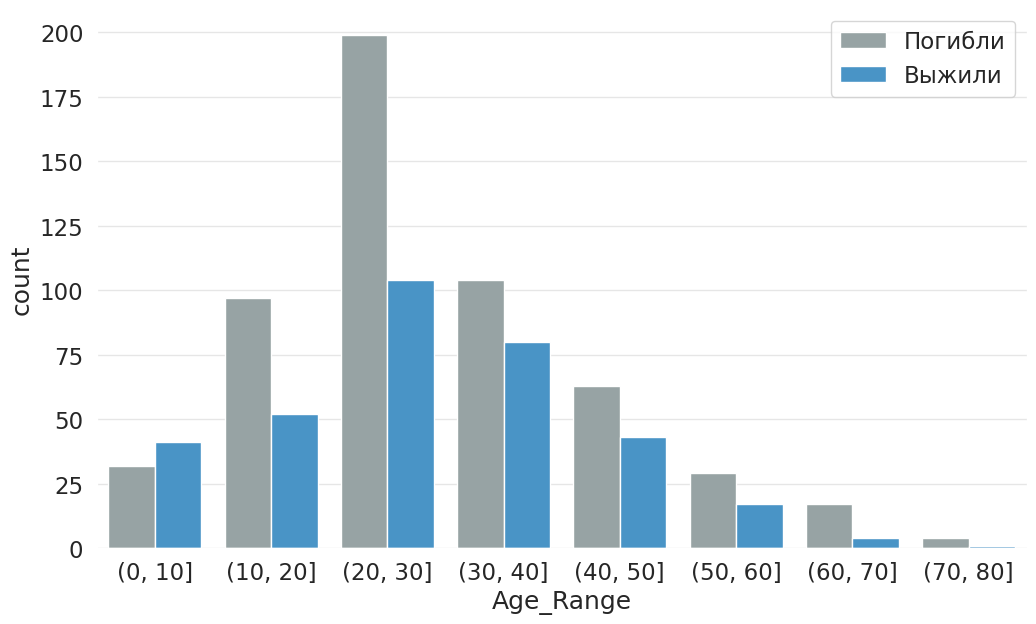

In [ ]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Погибли", "Выжили"])
plt.show()

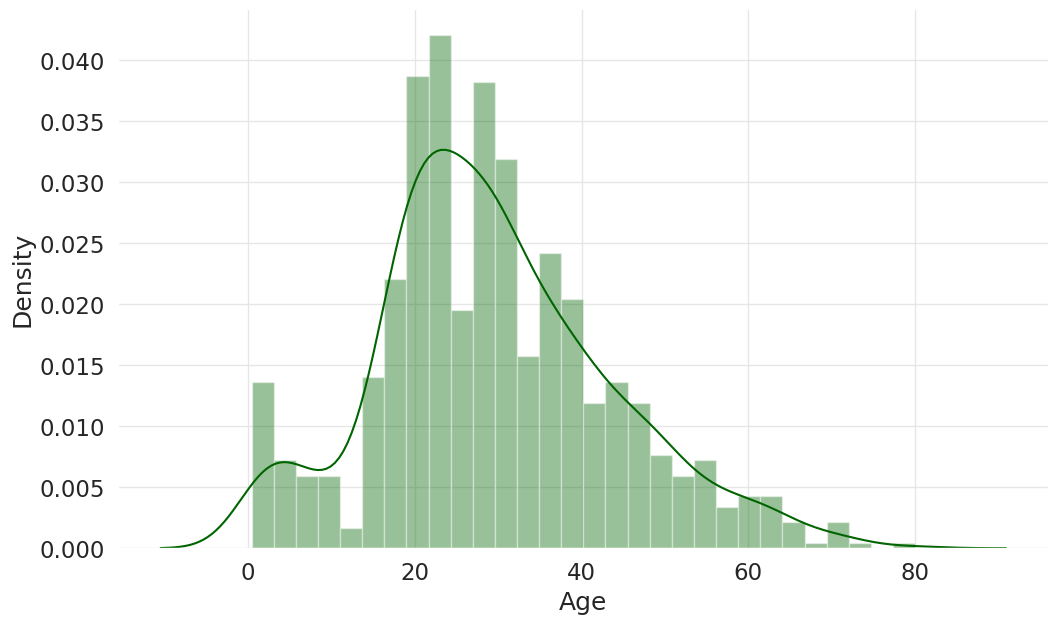

In [ ]:
sns.distplot(df['Age'].dropna(),color='darkgreen',bins=30)
plt.show()

Самому молодому путешественнику на борту было около двух месяцев, а самому старшему — 80 лет. Средний возраст пассажиров на борту был чуть менее 30 лет. Большая часть детей в возрасте до 10 лет выжила. В любой другой возрастной группе число жертв было выше, чем число выживших. Более 140 человек в возрастной группе 20-30 лет погибли в сравнении с примерно 80 выжившими того же возраста.

## ! Задание 2.
 Самостоятельно анализируем стоимость тарифа (Fare)


Схема анализа:

1) посмотреть с помощью value_counts() какие есть тарифы

2) возможно объединить тарифы в категории (например, Дешевые, Средние, Выше Среднего, Высокие) и создать новую переменную. Подсказка для разделения функция describe

3) визуализировать график и ответить на вопрос: "Как стоимость тарифа влияет на вероятность выживания?"

In [ ]:
df.Fare.describe()

,Fare
count,887.00000
mean,32.30542
std,49.78204
min,0.00000
25%,7.92500
50%,14.45420
75%,31.13750
max,512.32920


In [ ]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

## ! Задание 3
Самостоятельно анализируем Siblings/Spouses Aboard и Parents/Children Aboard

SibSp — это число братьев, сестер или супругов на борту у человека.

Parents/Children Aboard - признак содержал количество родителей или детей, с которыми путешествовал каждый пассажир.

Вопросы для анализа:
1. Как влияет наличие семьи на выживаемость?
2. Какие путешествия чаще: в одиночку или с родственниками?
3. Насколько изменяются шансы на выживание в случае путешествия в одиночку?

In [ ]:
df.columns = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_Range', 'Fare_Category']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_Range,Fare_Category
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,"(20, 30]",Low
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,"(30, 40]",High
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,"(20, 30]",Mid
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,"(30, 40]",High
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,"(30, 40]",Mid


In [ ]:
df.SibSp.describe()

,SibSp
count,887.000000
mean,0.525366
std,1.104669
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


# **Plotly**. Анимация

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
df = pd.read_csv("cereal.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
 16  cereal    77 non-null     float64
dtypes: float64(7), int64(6), object(4)
memory usage: 10.4+ KB


The fields in this dataset include:

* name: the name of the cereal
* mfr: the manufacturer of the cereal
A = American Home Food Products
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina)
* type: the type of cereal
C = cold cereal
H = hot cereal
* calories: the number of calories per serving
* protein: the number of grams of protein per serving
* fat: the number of grams of fat per serving
* sodium: the number of milligrams of sodium per serving
* fiber: the number of grams of dietary fiber per serving
* carbo: the number of grams of complex carbohydrates per serving
sugars: the number of grams of sugars per serving
potass: the number of milligrams of potassium
vitamins: the amount of vitamins and minerals
values = 0, 25, or 100 -> indicates the typical percentage of FDA recommended
shelf: display shelf
values = 1, 2, or 3 - counting from the floor
weight: the weight in ounces of one serving
cups: the number of cups in one serving
rating: a rating of the cereals - from consumer reports





In [ ]:
fig = px.scatter(df,x='sugars',y='rating',hover_name='name',
                 title='Содержание сахара и рейтинг продукта')
fig.show()

In [ ]:
fig = px.histogram(df,x='rating',title='Количество продуктов по рейтингу')
fig.show()

In [ ]:
fig = px.scatter(df,x='sugars',y='rating',hover_name='name',
                 facet_row='type',facet_col='shelf',color='mfr',size='calories')
fig.show()

In [ ]:
fig = px.treemap(df,path=['shelf','mfr'],
                 values='cereal',title='Продукты по месту произрастания')
fig.show()

In [ ]:
fig = px.sunburst(df,path=['mfr','shelf'],values='cereal',title='Продукты по компаниям')
fig.show()

In [ ]:
pd.options.plotting.backend = 'plotly'
fig = df[['sodium','potass']].plot(kind='hist',nbins=30,histnorm='probability density',
                                   title='Содержание натрия и калия в продуктах')
fig.show()

In [ ]:
fig = df[['sodium','potass']].plot(kind='hist',nbins=30,marginal='box',
                                   title='Содержание натрия и калия в продуктах')
fig.update_layout(xaxis_title_text='Миллиграммы',
                  yaxis_title_text='Количество продуктов',
                  bargap=0.1,
                  template='simple_white')
fig.add_shape(type='line',line_color='black',line_width=3,line_dash='dot',
              x0=100,x1=100,xref='x',y0=0,y1=14,yref='y')
fig.add_annotation(text='Сегодняшний план',x=100,y=12,arrowhead=1,showarrow=True)
fig.show()

In [ ]:
gapminder = px.data.gapminder()
df2007 = gapminder.query('year==2007')

* Country (country). Describes the country name
* Continent (continent). Describes the continent to which the country belongs
* Year (year). Describes the year to which the data belongs
* Life expectancy (life_exp). Describes the life expectancy for a given country in a given year


In [ ]:
df2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [ ]:
px.scatter(df2007,x='gdpPercap',y='lifeExp',size='pop',
           color='continent',hover_name='country')

In [ ]:
px.scatter(gapminder,x='gdpPercap',y='lifeExp',size='pop',
           color='continent',hover_name='country',animation_frame='year',log_x='True',
           range_x=[100,100000],range_y=[25,90],labels=dict(pop='Население',
           gdpPercap='ВВП на душу населения US$',lifeExp='Ожидаемая продолжит.жизни (лет)'))

In [ ]:
px.choropleth(gapminder,locations='iso_alpha',projection='natural earth',color='lifeExp',
              hover_name='country',animation_frame='year',
              color_continuous_scale=px.colors.sequential.Magma)

In [ ]:
# create a map using line_geo()
fig = px.line_geo(gapminder.query('year == 2007'), locations='iso_alpha', color='continent', projection='orthographic')
fig.show()